In [3]:
%matplotlib inline

In [74]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlalchemy

# 01. Data Acquisition

Topics:
* Acquiring data from different sources;
* CSV files;
* Web Services. JSON and XML;
* SQL databases;
* NoSQL databases: MongoDB;
* Excel files;
* Web crawling and scraping;
* Merging different sources. Constraints and validity.

Additional:
* Git

In [2]:
# Quick check
print("We are ready for action! :)")

We are ready for action! :)


The scientific method stays in the foundation:

* Ask a question
* Do some research (Have somebody implemented it already?)
* Form a hypothesis
* Test the hypothesis with an experiment (or a question!)
    * Experiment works -> Analyze the data
    * Experiment doesn't work -> Fix the experiment
* Results align with hypothesis -> OK
* Results don't alogn with the hypothesis -> new question, new hypothesis
* Communicate the results



In pandas there are two main ways to work with data:
* Table (DataFrame)
* List (Series)

It is so, due to the normalization

### 1. NumPy vs Python List (type safety)

In [7]:
# The normal python list is not type safe as we can see!
my_list = [5, 6, 7, "SoftUni, 3.14, False, [1, 2, 3]"]

# Check
my_list

[5, 6, 7, 'SoftUni, 3.14, False, [1, 2, 3]']

In [8]:
# We can also see the type of the list
type(my_list)

list

As we can see, the normal `python` list is not type safe, which could lead to some problems. On the other hand, NumPy arrays and Pandas are. Here are some examples: 

In [9]:
# NumPy array
my_np_array = np.array([4, 5, 6])

# Check
my_np_array

array([4, 5, 6])

In [10]:
# Let's check the type
type(my_np_array)

numpy.ndarray

In [11]:
# We could also ask for the data type
my_np_array.dtype

dtype('int64')

In [12]:
# But let's try adding other value to the np array
my_boolean_test = np.array([6, 7, 8, False])

# And let's see what we have in there
my_boolean_test

array([6, 7, 8, 0])

As we could see, the `NumPy` array converted the `False` value to `0`, which is logical enough, right? Yes, but we can come to the conclusion, that in the np array we could use only one data type (unlike the normal python list)

In [13]:
# If we try to check the data type, we could see, that it is int again
my_boolean_test.dtype

dtype('int64')

In [14]:
# Now let's try using True!
my_boolean_test = np.array([6, 7, 8, False, True])

# And let's check the value again
my_boolean_test

array([6, 7, 8, 0, 1])

As we can see, it converted `False` to `0` and `True` to `1`!

In [23]:
# Okay, okay, okay, but what if we try to use a string instead?
my_boolean_test = np.array([6, 7, 8, False, True, "Deyan"])

# And let's check the value again
print("----------------------\nValue: \t\t", my_boolean_test)
print("Data type: \t", my_boolean_test.dtype)

----------------------
Value: 		 ['6' '7' '8' 'False' 'True' 'Deyan']
Data type: 	 <U21


Well, as we can see, it converted everything into strings!! So `NumPy` really tries to use the same data type :)

In [24]:
# Okay, one last test, what if we add list in there?
# Okay, okay, okay, but what if we try to use a string instead?
my_boolean_test = np.array([6, 7, 8, False, True, "Deyan", [42, 63, 11]])

# And let's check the value again
print("----------------------\nValue: \t\t", my_boolean_test)
print("Data type: \t", my_boolean_test.dtype)

----------------------
Value: 		 [6 7 8 False True 'Deyan' list([42, 63, 11])]
Data type: 	 object


/tmp/ipykernel_20060/175031211.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  my_boolean_test = np.array([6, 7, 8, False, True, "Deyan", [42, 63, 11]])


Interesting results, yes. We got a warning! But that is not all, from the results we could see, that it _converted_ everything into `objects`.

### 2. Pandas

In [26]:
# Let's create our first pandas series
pd.Series([4, 5.5, 6])

0    4.0
1    5.5
2    6.0
dtype: float64

In [35]:
# We could also change the data type
pd.Series([4, 5.5, 6], dtype = "float32")

0    4.0
1    5.5
2    6.0
dtype: float32

In [37]:
# Or, we could also convert
pd.Series([4, 5, 6]).astype(np.float16)

0    4.0
1    5.0
2    6.0
dtype: float16

But is there any type safety in `Pandas`?

In [39]:
# As we can see, it converted it into object
pd.Series([1, 2, 3, "Deyan Sirakov"])

0                1
1                2
2                3
3    Deyan Sirakov
dtype: object

In [40]:
# And what if we want to get the sum?
pd.Series([1, 2, 3, "Deyan Sirakov"]).sum()

TypeError: unsupported operand type(s) for +: 'int' and 'str'

**BOOM** - Exception. So yea, it is really good for us to have the same data types.

### 3. Data Sources

`Data Set` - It is a **set** of data, not a table!! That is why we never say `Data table` (in this context). `All rows are different.`

**Unstructured data** - Data, that doesn't have a model (schema/metadata). For example: Images, plain text, audio, web pages

Atributes, Features - Variables: *Easy understanding*


CSV - Column Separated Values

In [46]:
# Let's read our first data set in Python
accidents_data = pd.read_csv("accidents.csv")

# Visualize it
accidents_data

,Miles from Home,% of Accidents
0,less than 1,23
1,1 to 5,29
2,6 to 10,17
3,11 to 15,8
4,16 to 20,6
5,over 20,17


In [47]:
# We could get the shape
accidents_data.shape

(6, 2)

In [48]:
# Alternatively, we could get the columns
accidents_data.columns

Index(['Miles from Home', '% of Accidents'], dtype='object')

In [49]:
# We could also check by column
accidents_data["Miles from Home"]

0    less than 1
1         1 to 5
2        6 to 10
3       11 to 15
4       16 to 20
5        over 20
Name: Miles from Home, dtype: object

The `column` of the `DataFrame` becomes `Series`.

In [52]:
print("-----------------\nType of DataFrame: \t", type(accidents_data))
print("Type of Column: \t", type(accidents_data["Miles from Home"]))

-----------------
Type of DataFrame: 	 <class 'pandas.core.frame.DataFrame'>
Type of Column: 	 <class 'pandas.core.series.Series'>


In [53]:
# We could also get the index
accidents_data.index

RangeIndex(start=0, stop=6, step=1)

df - Data Frame (Don't use it)

We could also visualize it using `plt`

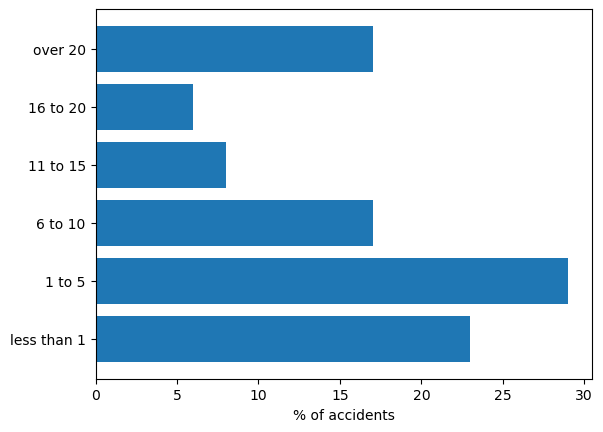

In [56]:
plt.barh(accidents_data["Miles from Home"], accidents_data["% of Accidents"])

plt.xlabel("% of accidents")
plt.show()

In [61]:
# We could also read Excel files
green_trip_data = pd.read_excel("green_tripdata_2015-09.xls")

# Check
green_trip_data

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
0,2,2015-09-01 00:02:34,2015-09-01 00:02:38,N,5,-73.979485,40.684956,-73.979431,40.685020,1,...,7.8,0.0,0.0,1.95,0.0,NaN,0.0,9.75,1,2
1,2,2015-09-01 00:04:20,2015-09-01 00:04:24,N,5,-74.010796,40.912216,-74.010780,40.912212,1,...,45.0,0.0,0.0,0.00,0.0,NaN,0.0,45.00,1,2
2,2,2015-09-01 00:01:50,2015-09-01 00:04:24,N,1,-73.921410,40.766708,-73.914413,40.764687,1,...,4.0,0.5,0.5,0.50,0.0,NaN,0.3,5.80,1,1
3,2,2015-09-01 00:02:36,2015-09-01 00:06:42,N,1,-73.921387,40.766678,-73.931427,40.771584,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1
4,2,2015-09-01 00:00:14,2015-09-01 00:04:20,N,1,-73.955482,40.714046,-73.944412,40.714729,1,...,5.0,0.5,0.5,0.00,0.0,NaN,0.3,6.30,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65530,2,2015-09-02 16:51:59,2015-09-02 17:04:00,N,1,-73.829605,40.759716,-73.832214,40.751514,1,...,9.0,1.0,0.5,0.00,0.0,NaN,0.3,10.80,2,1
65531,2,2015-09-02 16:53:51,2015-09-02 17:04:32,N,1,-73.962112,40.805710,-73.984970,40.769550,1,...,10.5,1.0,0.5,2.46,0.0,NaN,0.3,14.76,1,1
65532,2,2015-09-02 16:57:21,2015-09-02 17:05:03,N,1,-73.829941,40.713718,-73.831917,40.702145,1,...,7.0,1.0,0.5,2.20,0.0,NaN,0.3,11.00,1,1
65533,2,2015-09-02 16:51:42,2015-09-02 17:05:28,N,1,-73.860748,40.832661,-73.845169,40.845306,1,...,10.5,1.0,0.5,2.46,0.0,NaN,0.3,14.76,1,1


In [62]:
# Check the data types
green_trip_data.dtypes

VendorID                          int64
lpep_pickup_datetime     datetime64[ns]
Lpep_dropoff_datetime    datetime64[ns]
Store_and_fwd_flag               object
RateCodeID                        int64
Pickup_longitude                float64
Pickup_latitude                 float64
Dropoff_longitude               float64
Dropoff_latitude                float64
Passenger_count                   int64
Trip_distance                   float64
Fare_amount                     float64
Extra                           float64
MTA_tax                         float64
Tip_amount                      float64
Tolls_amount                    float64
Ehail_fee                       float64
improvement_surcharge           float64
Total_amount                    float64
Payment_type                      int64
Trip_type                         int64
dtype: object

Let's try making a geographical plot using the data

In [65]:
# Prepare
green_trip_data_filtered = green_trip_data[
    (green_trip_data.Pickup_latitude != 0) &
    (green_trip_data.Pickup_longitude != 0)
]

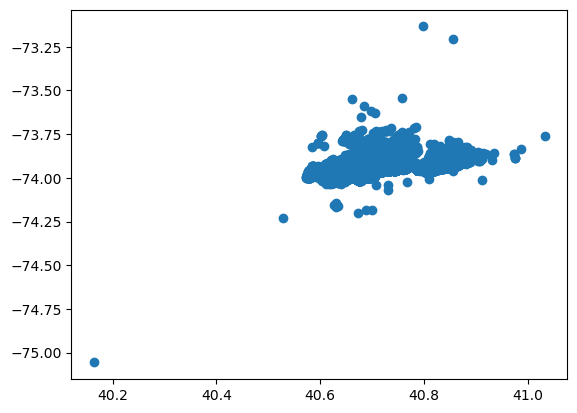

In [66]:
# Plot geographically the data
plt.scatter(green_trip_data_filtered.Pickup_latitude, green_trip_data_filtered.Pickup_longitude)

We could see where everything is based on the longitude and latutude data

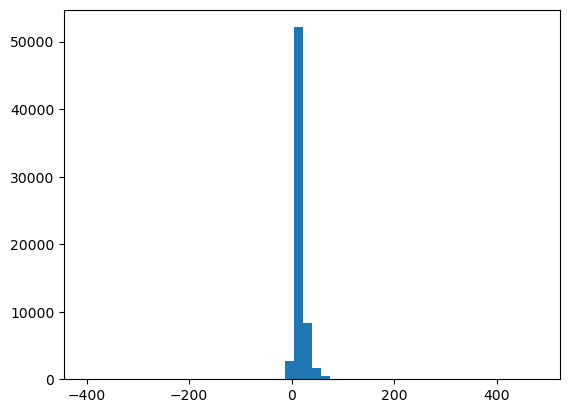

In [68]:
plt.hist(green_trip_data.Total_amount, bins=50)
plt.show() # We could remove the bad looking text like this

In [71]:
# Oi, there are some results less than zero!
green_trip_data[green_trip_data.Total_amount < 0]

,VendorID,lpep_pickup_datetime,Lpep_dropoff_datetime,Store_and_fwd_flag,RateCodeID,Pickup_longitude,Pickup_latitude,Dropoff_longitude,Dropoff_latitude,Passenger_count,...,Fare_amount,Extra,MTA_tax,Tip_amount,Tolls_amount,Ehail_fee,improvement_surcharge,Total_amount,Payment_type,Trip_type
196,2,2015-09-01 00:11:22,2015-09-01 00:20:26,N,1,-73.949593,40.680508,-73.942253,40.700764,1,...,-2.5,-0.5,-0.5,0.0,0.0,NaN,-0.3,-3.8,3,1
437,2,2015-09-01 00:31:49,2015-09-01 00:35:08,N,1,-73.903450,40.745419,-73.914360,40.745659,5,...,-4.5,-0.5,-0.5,0.0,0.0,NaN,-0.3,-5.8,4,1
568,2,2015-09-01 00:43:31,2015-09-01 00:44:41,N,1,-73.844284,40.721066,-73.844727,40.720230,1,...,-3.0,-0.5,-0.5,0.0,0.0,NaN,-0.3,-4.3,3,1
961,2,2015-09-01 00:14:55,2015-09-01 00:15:11,N,2,-73.946716,40.714317,-73.944954,40.714466,2,...,-52.0,0.0,-0.5,0.0,0.0,NaN,-0.3,-52.8,4,1
1297,2,2015-09-01 01:00:16,2015-09-01 01:01:07,N,1,-73.863174,40.835274,-73.868782,40.836048,1,...,-2.5,-0.5,-0.5,0.0,0.0,NaN,-0.3,-3.8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62113,2,2015-09-02 15:12:08,2015-09-02 15:12:12,N,1,-73.824844,40.677002,-73.824837,40.677029,1,...,-2.5,0.0,-0.5,0.0,0.0,NaN,-0.3,-3.3,3,1
62252,2,2015-09-02 15:04:03,2015-09-02 15:04:39,N,1,-73.962517,40.809719,-73.962761,40.809769,1,...,-2.5,0.0,-0.5,0.0,0.0,NaN,-0.3,-3.3,3,1
62432,2,2015-09-02 15:25:44,2015-09-02 15:31:13,N,1,-73.876099,40.876999,-73.875603,40.877567,1,...,-5.0,0.0,-0.5,0.0,0.0,NaN,-0.3,-5.8,3,1
64197,2,2015-09-02 16:03:36,2015-09-02 16:04:12,N,1,-73.899155,40.679638,-73.898666,40.678555,1,...,-2.5,-1.0,-0.5,0.0,0.0,NaN,-0.3,-4.3,4,1


In [70]:
# Let's describe the table
green_trip_data.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,65535.0,1.784497,0.411174,1.000000,2.000000,2.000000,2.000000,2.000000
RateCodeID,65535.0,1.124910,0.781101,1.000000,1.000000,1.000000,1.000000,99.000000
Pickup_longitude,65535.0,-73.808157,3.040510,-75.056404,-73.958015,-73.944176,-73.915222,0.000000
Pickup_latitude,65535.0,40.685263,1.676843,0.000000,40.700670,40.753559,40.804974,41.032986
Dropoff_longitude,65535.0,-73.851127,2.466746,-75.081306,-73.967205,-73.944740,-73.909496,0.000000
Dropoff_latitude,65535.0,40.706524,1.360617,0.000000,40.704659,40.754356,40.798569,41.227257
Passenger_count,65535.0,1.349432,1.023215,0.000000,1.000000,1.000000,1.000000,9.000000
Trip_distance,65535.0,2.901488,3.026139,0.000000,1.020000,1.880000,3.650000,62.340000
Fare_amount,65535.0,12.403890,10.604922,-400.000000,6.000000,9.500000,15.500000,400.000000
Extra,65535.0,0.304768,0.388277,-1.000000,0.000000,0.000000,0.500000,12.000000


### 4. Reading Data from Web services
Some web services, which work over the HTTP protocol provide data in the several formats:
* JSON
* XML
* API

For the sake of this demo, we will use OpenLibraryAPI. We will also use the `read_json()` function and `orient = "index"` to T the "matrix".

In [73]:
# Let's first read the data
books_data = pd.read_json("https://openlibrary.org/api/books?bibkeys=ISBN:9780345354907,ISBN:0881847690,LCCN:2005041555,ISBN:0060957905&format=json", orient = "index")

# And display it!
books_data

,bib_key,info_url,preview,preview_url,thumbnail_url
ISBN:9780345354907,ISBN:9780345354907,https://openlibrary.org/books/OL9831606M/The_C...,borrow,https://archive.org/details/caseofcharlesdex00...,https://covers.openlibrary.org/b/id/207586-S.jpg
ISBN:0881847690,ISBN:0881847690,https://openlibrary.org/books/OL22232644M/Watc...,borrow,https://archive.org/details/watchersoutoftim00...,https://covers.openlibrary.org/b/id/9871313-S.jpg
LCCN:2005041555,LCCN:2005041555,https://openlibrary.org/books/OL3421202M/At_th...,restricted,https://archive.org/details/atmountainsofmad00...,https://covers.openlibrary.org/b/id/8259841-S.jpg
ISBN:0060957905,ISBN:0060957905,https://openlibrary.org/books/OL6784868M/Tales...,noview,https://openlibrary.org/books/OL6784868M/Tales...,https://covers.openlibrary.org/b/id/676505-S.jpg


### 5. SQL

In [77]:
# Well, I do not have working db now
# TODO: Connect and work a little with SQLAlchemy

# pd.read_sql() # This is how we read

### 6. Web Scraping

Get data from a website using a script (in few words)
* `scrapy` is a good one for web scraping

### 7. Data Guidelines


1. Meet the data
2. Clean the data
3. Repeat

Tips:
* Automate as much as possible!
* Save the raw data
* Document the process
* Validate the data

### „Валидация му е майката.“ - Данчо

To check:
* Time series
* ETL
* LLMs
* Geographical Plot
* `dask` - For reading data frames

Date: 15.06.2023